## Breast Cancer Predictor using Nueral Network

[Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

[Google Colab Notebook](https://colab.research.google.com/drive/10dN0a8IpMxkdqEO70lQWoCithaD4jOHl)

[Github](https://github.com/z5208980/machine-learning-health/tree/main/breast_cancer)
 
In 2022, breast cancer affects 1 in 7 women and 1 in 155 men in Australia. Though there is no specific cause of breast cancer, the risk of having breast cancer depends on natural occurs such as family history, age, and gene, however it is said that smoking and alcohol can have an affect. Breast cancer often affects older aged women, typically over 50. It occurs when cells in the breast grow at an abnormal path and form a tumour. Treatment is available such as sugery, or radiotherapy.

The target column in the dataset will be `Diagnosis` which as an output of either M (malignant) or B (benign). Both are characteristic of being lump near the breast. **Malignant** cells are ever growing compared to Benign cells and is a form of breast cancer that results in abnormal cell growth Comparing it to **Benign** cells, the benign cells are non-cancerous and are not life threatening but still gives a breast a lumpy texture.

The remaining data (features) of the dataset will be measurements of the cells nucleous. This can be collected via pathology request or biopsy where a sample of tissue is collected. In the case of this dataset, the "features are computed from digitalised image of a breast mass". *I would assume theses are the cells of the tumour from breast screening of the lumps in the breast*. These features include,
<details>
  <summary>List of features (33)</summary>
  - radius_mean
  - texture_mean
  - perimeter_mean
  - area_mean
  - smoothness_mean
  - compactness_mean
  - concavity_mean
  - concave points_mean
  - symmetry_mean
  - fractal_dimension_mean
  - radius_se
  - texture_se
  - perimeter_se
  - area_se
  - smoothness_se
  - compactness_se
  - concavity_se
  - concave points_se
  - symmetry_se
  - fractal_dimension_se
  - radius_worst
  - texture_worst
  - perimeter_worst
  - area_worst
  - smoothness_worst
  - compactness_worst
  - concavity_worst
  - concave points_worst
  - symmetry_worst
  - fractal_dimension_worst
<details>

In [34]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [46]:
# Loading and seeking the data

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/z5208980/machine-learning-health/main/breast_cancer/data/data.csv')

print(f"There have {df.shape[0]} rows with {df.shape[1]} columns including targets")

# Seek the dataset
df.head(5)

There have 569 rows with 33 columns including targets


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
# Processing the data
 
# Remove uneccessary features
df.drop(columns=['Unnamed: 32', 'id'], axis = 1, inplace=True)

# breast_cancer_data.isnull().sum() # This dataset has no nan values

# Encode the target, which converts Benign -> 0, Malignant -> 1
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

# Save
filename = '/content/sample_data/processed.csv'
df.to_csv(filename, index=False)

In [37]:
X = df.drop(columns='diagnosis', axis=1)
y = df['diagnosis']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=200)

scaler = StandardScaler() # Use StandardScaler if postprocessing 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The choosen model use is **Keras Neural Network** which yields a 94% accurancy in training and testing. The model uses an Adam optimiser will the lost function of cross entropy.

## Using the model

As mention to use the model, it requires a list of syptoms given in `severity.csv`. To validate if the inputs are valid, the in process of checking if the symptoms exist in the columns and if the input list length if between 1 and 17.

In [39]:
tf.random.set_seed(200)

# Layout node: 30 -> 20 -> 2
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(30,)),
  keras.layers.Dense(20, activation='relu'),
  keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.1, epochs=10)

print('RESULT')
loss, accuracy =  model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

# Save model
filename = '/content/sample_data/model.h5'
model.save(filename)

Epoch 1/10
12/12 [==============================] - 1s 16ms/step - loss: 1.0875 - accuracy: 0.5875 - val_loss: 0.7569 - val_accuracy: 0.6047
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.7877 - accuracy: 0.6057 - val_loss: 0.5678 - val_accuracy: 0.6512
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.6527 - val_loss: 0.4465 - val_accuracy: 0.6977
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.4350 - accuracy: 0.7363 - val_loss: 0.3663 - val_accuracy: 0.8140
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.3435 - accuracy: 0.8198 - val_loss: 0.3106 - val_accuracy: 0.8605
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 0.8747 - val_loss: 0.2715 - val_accuracy: 0.9070
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.2460 - accuracy: 0.9008 - val_loss: 0.2427 - val_accuracy: 0.9535
Epoch 8/10
12/12 [=

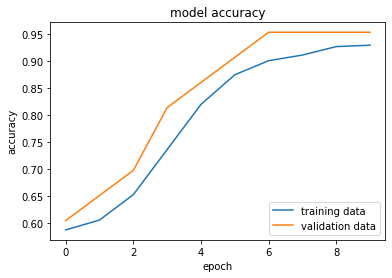

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

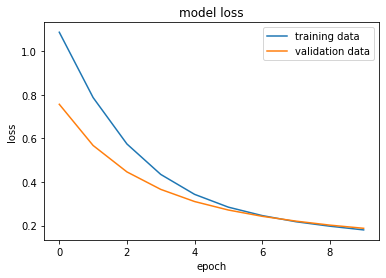

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [42]:
model = keras.models.load_model('/content/sample_data/model.h5')

input = [11.76,21.6,74.72,427.9,0.08637,
  0.04966,0.01657,0.01115,0.1495,
  0.05888,0.4062,1.21,2.635,28.47,
  0.005857,0.009758,0.01168,0.007445,
  0.02406,0.001769,12.98,25.72,82.98,
  516.5,0.1085,0.08615,0.05523,0.03715,
  0.2433,0.06563]

input = np.asarray(input)
input = input.reshape(1,-1)

input = scaler.transform(input)

# This is confidence of each label. Eg. [[0.6898223  0.00158861]] means
# 0 -> the model predict 68% it is Malignant
# 1 -> the model predicted 0.1% it is Benign
output_labels = model.predict(input)
print(output_labels)

output = [np.argmax(output_labels)]
print(f"Predicted: {output[0]}")

[[0.4339753  0.01058587]]
Predicted: 0
